# House Prices – Advanced Regression Techniques (Kaggle)

## 1. Contextualização do Dataset

### 1.1 Introdução
O desafio **House Prices – Advanced Regression Techniques**, disponível no Kaggle, tem como objetivo prever o preço final de venda de casas na cidade de Ames, Iowa, a partir de um conjunto de **79 variáveis explicativas** que descrevem características físicas, localização e qualidade dos imóveis.

Este é um problema clássico de **Regressão Supervisionada**, onde a variável alvo é:
- **SalePrice**: preço final de venda do imóvel.

O desempenho no Kaggle é avaliado pela métrica **RMSE (Root Mean Squared Error)** aplicada ao logaritmo do preço (log(SalePrice)).

## 2. Importação das Bibliotecas

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

## 3. Exploração Inicial dos Dados

### 3.1 Carregamento do Dataset

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Desafio Kaggle/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Desafio Kaggle/test.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.2 Informações Gerais

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.3 Estatísticas Descritivas

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3.4 Distribuição da Variável Alvo

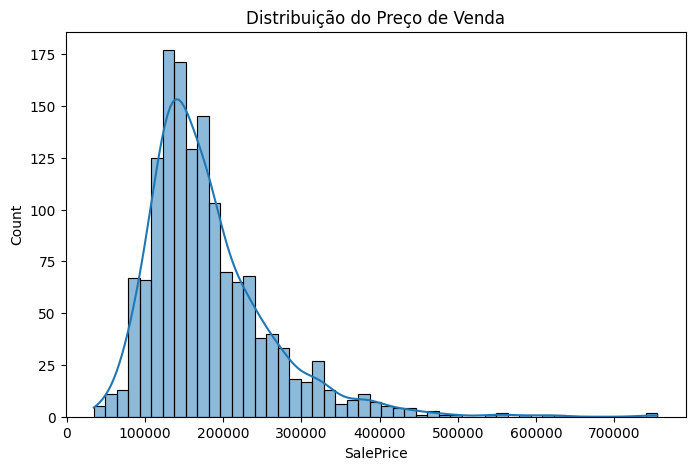

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')
plt.show()

> Observa-se uma assimetria positiva, indicando a necessidade de aplicar uma transformação logarítmica.

In [7]:
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])

## 4. Preparação dos Dados

### 4.1 Separação de Features e Target

In [8]:
X = train_df.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = train_df['SalePrice_log']

### 4.2 Identificação de Variáveis Numéricas e Categóricas

In [9]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

### 4.3 Tratamento de Dados Faltantes

- **Numéricos**: preenchidos com a mediana
- **Categóricos**: preenchidos com o valor mais frequente

### 4.4 Pré-processamento (Imputação + Padronização + One-Hot Encoding)

In [13]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

## 5. Divisão dos Dados

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 6. Modelagem

### 6.1 Modelo Base – Regressão Linear

In [15]:
lin_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', LinearRegression())])

### 6.2 Avaliação

In [16]:
y_pred = lin_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.12800561331465327)

## 7. Comparação de Modelos

### 7.1 Ridge e Lasso

In [17]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001)
}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name} RMSE médio: {-scores.mean():.4f}")

Linear RMSE médio: 0.1566
Ridge RMSE médio: 0.1450
Lasso RMSE médio: 0.1373


### 7.2 Random Forest

In [18]:
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Random Forest RMSE médio: {-scores.mean():.4f}")

Random Forest RMSE médio: 0.1425


## 8. Avaliação e Interpretação

### 8.1 Visualização: Valores Reais vs Preditos

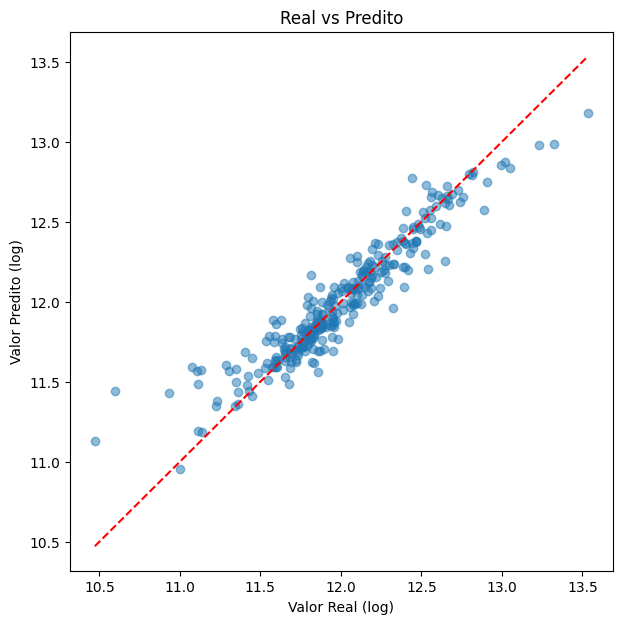

In [19]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

plt.figure(figsize=(7,7))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Valor Real (log)')
plt.ylabel('Valor Predito (log)')
plt.title('Real vs Predito')
plt.show()

> O modelo apresenta boa capacidade preditiva, com dispersão relativamente próxima da diagonal.

## 9. Conclusão

### 9.1 Principais Achados
- A transformação logarítmica da variável alvo melhora significativamente a performance.
- Modelos baseados em árvores (Random Forest) superam regressões lineares simples.
- O uso de pipelines garante organização, limpeza e reprodutibilidade.

### 9.2 Próximos Passos
- Testar **Gradient Boosting, XGBoost ou LightGBM**
- Ajuste fino de hiperparâmetros (GridSearch / RandomSearch)
- Feature engineering mais avançada (interações, agregações)

## 11. Reprodutibilidade

1. Baixar o dataset no Kaggle
2. Colocar `train.csv` e `test.csv` na mesma pasta do notebook
3. Executar as células sequencialmente